# Exemplo problema Iris

## Aquisição e pré-processamento

In [1]:
# https://scikit-learn.org/stable/datasets/index.html
from sklearn import datasets
import pandas as pd
import numpy as np
iris = datasets.load_iris()

In [2]:
type(iris)

sklearn.utils.Bunch

In [3]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
df.shape

(150, 5)

In [6]:
df['target'].value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

In [7]:
iris['target_names'] 

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df.target.replace(df['target'].unique(), iris['target_names'], inplace=True)

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
df['target'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64

In [11]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Análise descritiva

In [13]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target           object
dtype: object

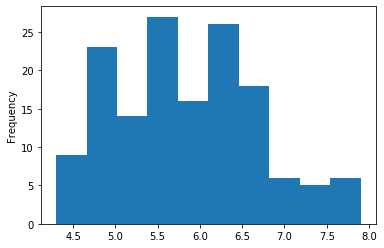

In [14]:
%matplotlib inline
df['sepal_length'].plot(kind='hist')

Text(0.5, 1.0, 'Distribuição sepal_length')

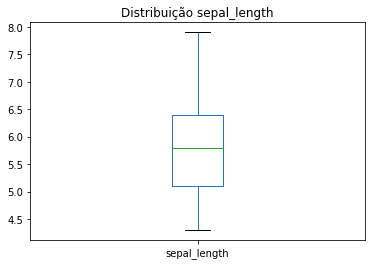

In [15]:
y = df['sepal_length'].plot(kind='box')
y.set_title('Distribuição sepal_length')

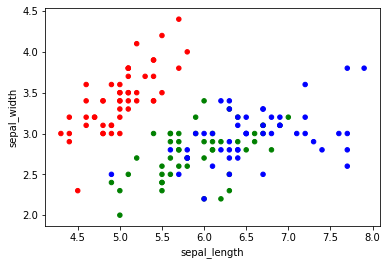

In [16]:
x = df.plot.scatter(x='sepal_length', y='sepal_width', color=df['target'].replace(df['target'].unique(),
                                               ['red','green','blue']))

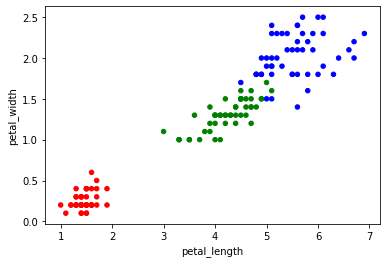

In [17]:
x = df.plot.scatter(x='petal_length', y='petal_width', 
                    color=df['target'].replace(df['target'].unique(),
                                               ['red','green','blue']))

Text(0, 0.5, 'Petal Width')

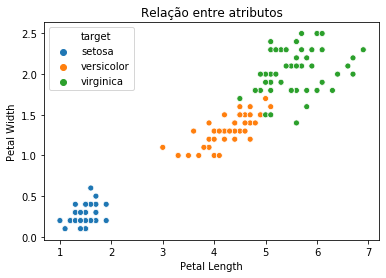

In [18]:
import seaborn as sns
x = sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='target')
x.set_title("Relação entre atributos")
x.set_xlabel("Petal Length")
x.set_ylabel("Petal Width")

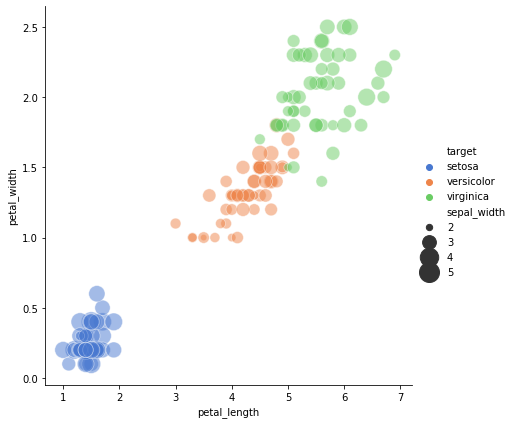

In [19]:
sns.relplot(x="petal_length", y="petal_width", hue="target", size="sepal_width",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

# Divisão conjunto de treinamento e validação

In [30]:
# X_ = independentes ou de entrada (input)
# y_ = output (saída) ou dependente
# y <- X_{1} + X_{2} + X_{3} + X_{4} + ... + X_{N}
import random
random.sample([1,2,3,4,5], k=1)

[1]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:4], df['target'], test_size=0.2, random_state=4)

In [32]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
84,5.4,3.0,4.5,1.5
47,4.6,3.2,1.4,0.2
108,6.7,2.5,5.8,1.8
1,4.9,3.0,1.4,0.2
93,5.0,2.3,3.3,1.0


In [33]:
y_train.head()

84     versicolor
47         setosa
108     virginica
1          setosa
93     versicolor
Name: target, dtype: object

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


# Modelagem com algoritmos indutores de árvores de decisão

In [69]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)

In [70]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Imprimindo a árvore

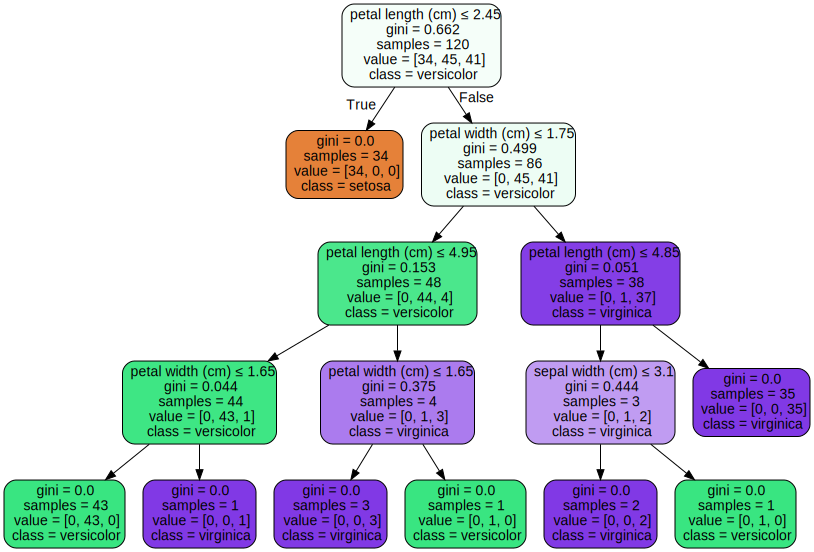

In [71]:
import graphviz
g = tree.export_graphviz(model, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)

graph = graphviz.Source(g) 
graph

## Avaliando o modelo com o próprio conjunto de treinamento

In [72]:
predicted = model.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, predicted)

array([[34,  0,  0],
       [ 0, 45,  0],
       [ 0,  0, 41]])

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, predicted)

1.0

## Avaliando o modelo com o conjunto de teste

In [74]:
predicted = model.predict(X_test)
confusion_matrix(y_test, predicted)

array([[16,  0,  0],
       [ 0,  4,  1],
       [ 0,  0,  9]])

In [75]:
accuracy_score(y_test, predicted)

0.9666666666666667

# Validação usando cross-validation

Nas avaliações apresentadas acima, o modelo teve 100% de acurácia para o conjunto de treinamento e 96.67% de acurácia para o conjunto de teste. O que indica um *overfitting* do modelo. Em outras palavras, este modelo consegue descrever muito bem o dataset usado para treinamento, mas não é capaz de ter o mesmo desempenho para novos exemplos - não é capaz de generalizar.  

No entanto, será que é um *overfitting* de fato? Só foi identificado 1 erro. Ou seja, o conjunto de teste não é tão grande. Será que não é melhor utilizar outra abordagem para avaliação do modelo? 

In [82]:
from sklearn.model_selection import cross_val_score

X = df.iloc[:,0:4]
y = df['target']

model = tree.DecisionTreeClassifier()
model = model.fit(X,y)

scores = cross_val_score(model, X, y, cv=5)

In [83]:
scores

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

In [84]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.95 (+/- 0.03)


# Mudando os hiperparâmetros da árvore

Um dos hiperparâmetros que podemos mudar em um algoritmo de árvore de decisão é a profundidade da árvore de decisão. 

In [85]:
model = tree.DecisionTreeClassifier(max_depth=3)
model = model.fit(X,y)
scores = cross_val_score(model, X, y, cv=5)

In [86]:
scores

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [87]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.96 (+/- 0.02)


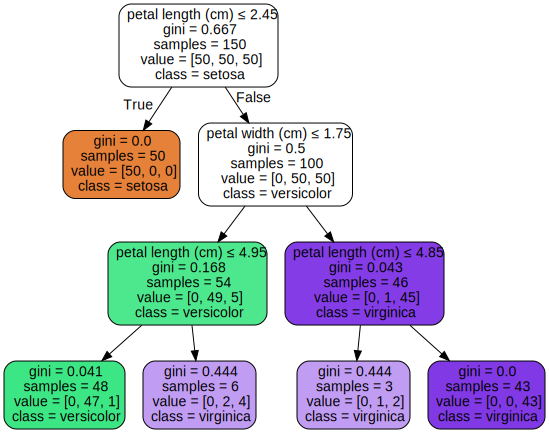

In [88]:
g = tree.export_graphviz(model, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)

graph = graphviz.Source(g) 
graph